# <center>Feature Selection using Fisher Score and Chi2 (χ2) Test</center>

<p style="font-family: Times New Roman, serif; font-size:16pt; line-height: 1.5;">&nbsp; <b>Feature Selection</b> is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance. Feature selection and Data cleaning should be the first and most important step of your model designing.</p>

<p style="font-family: Times New Roman, serif; font-size:16pt; line-height: 1.5;">&nbsp;<b>Fisher score</b> is one of the most widely used supervised feature selection methods. However, it selects each feature independently according to their scores under the Fisher criterion, which leads to a suboptimal subset of features.</p>

<p style="font-family: Times New Roman, serif; font-size:16pt; line-height: 1.5;">&nbsp;<b>chi-squared test</b> , also written as χ2 test, is any statistical hypothesis test where the sampling distribution of the test statistic is a chi-squared distribution. It is a technique to determine the relationship between the categorical variables. The chi-square value is calculated between each feature and the target variable, and the desired number of features with the best chi-square value is selected.</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
df = pd.read_csv('D:/titanic_dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop(labels=['Age', 'Cabin'], axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].copy()

In [ ]:
data.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [ ]:
# Convert male and female in to 0 for male and 1 for female
sex = {'male': 0, 'female': 1}
data['Sex'] = data['Sex'].map(sex)

In [ ]:
port = {'S': 0, 'C': 1, 'Q': 2}
data['Embarked'] = data['Embarked'].map(port)

In [ ]:
data.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,0,1,0,0
1,1,1,1,0,1
2,3,1,0,0,0
3,1,1,1,0,0
4,3,0,0,0,0


## Do Fisher Score

In [ ]:
x = data.copy()
y = df['Survived']

In [ ]:
x.shape, y.shape

((889, 5), (889,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
f_score = chi2(x_train, y_train)

In [ ]:
f_score

(array([ 19.79353649, 124.72588379,   0.60536413,   5.57657813,
         13.98755614]),
 array([8.62739279e-06, 5.84339730e-29, 4.36538656e-01, 1.82022541e-02,
        1.84024548e-04]))

In [ ]:
p_values = pd.Series(f_score[1], index= x_train.columns)
p_values.sort_values(ascending = True, inplace = True)

In [ ]:
p_values

Sex         5.843397e-29
Pclass      8.627393e-06
Embarked    1.840245e-04
Parch       1.820225e-02
SibSp       4.365387e-01
dtype: float64

<AxesSubplot:>

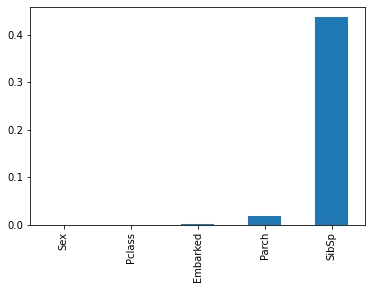

In [ ]:
p_values.plot.bar()

In [ ]:
def run_randomForest(x_train, x_test, y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

## find the accuracy of selected features 

In [ ]:
x_train_2 = x_train[['Sex', 'Pclass']]
x_test_2 = x_test[['Sex', 'Pclass']]

In [ ]:
run_randomForest(x_train_2, x_test_2, y_train, y_test)

Accuracy:  0.7602996254681648


In [ ]:
x_train_3 = x_train[['Sex', 'Pclass', 'Embarked']]
x_test_3 = x_test[['Sex', 'Pclass', 'Embarked']]

In [ ]:
run_randomForest(x_train_3, x_test_3, y_train, y_test)

Accuracy:  0.7752808988764045


In [ ]:
x_train_4 = x_train[['Sex', 'Pclass', 'Embarked', 'Parch']]
x_test_4 = x_test[['Sex', 'Pclass', 'Embarked', 'Parch']]

In [ ]:
run_randomForest(x_train_4, x_test_4, y_train, y_test)

Accuracy:  0.7752808988764045


In [ ]:
# Take all features
run_randomForest(x_train, x_test, y_train, y_test)

Accuracy:  0.7565543071161048


<p style="font-family: Times New Roman, serif; font-size:16pt; line-height: 1.5;">According to the accuracy of selecting feature, we see that the small p_value is very importance features that we have to select.</p>